Question 1 (30 Points)

A sample of 30 respondents was interviewed using mall intercept interviewing. The respondents were asked to indicate their degree of agreement with the following statements using a seven-point scale (1 = strongly disagree, 7 = strongly agree).

•	V1 = It is important to buy a toothpaste that prevents cavities

•	V2 = I like a toothpaste that gives a shiny teeth

•	V3 = A toothpaste should strengthen your gums teeth

•	V4 = I prefer a toothpaste that freshens breath

•	V5 = Prevention of tooth decay is not an important benefit offered by a toothpaste

•	V6 = The most important consideration in buying a toothpaste is attractive teeth

By using the variables,

(1) How many factors is extracted from data for principal component analysis?

(2) What is the total percentage of variance explained by these principal components?

(3)Which variables are included in the same factors ? How can you name these factors?

You can find the data at

https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv

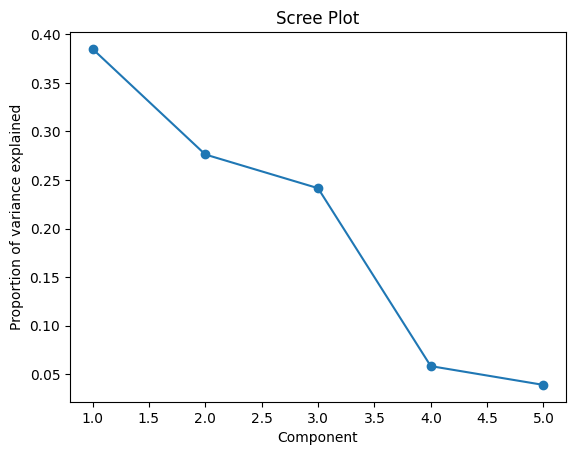

In [7]:
#Q1 (1)

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Toothpaste.csv')

X = df.iloc[:, 1:]

pca = PCA()
pca.fit(X)

plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Component')
plt.ylabel('Proportion of variance explained')
plt.title('Scree Plot')
plt.show()

In [8]:
#Q1(2)
X = df.iloc[:, 1:]

pca = PCA()
pca.fit(X)

var_exp = pca.explained_variance_ratio_

total_var_exp = sum(var_exp)

print("Total percentage of variance explained by all components: {:.2%}".format(total_var_exp))

Total percentage of variance explained by all components: 100.00%


In [9]:
#Q1(3)
loadings = pca.components_.T * (pca.explained_variance_ ** 0.5)

for i, comp in enumerate(loadings.T):
    print("Factor {}: {}".format(i+1, ", ".join(X.columns[comp.argsort()[::-1]])))
    print("Loadings: {}".format(comp))
    print()

Factor 1: V3, V6, V2, V4, V5
Loadings: [-0.8166363   1.5662894  -0.91004129 -0.98600047 -0.59476885]

Factor 2: V6, V2, V4, V3, V5
Loadings: [ 0.78054116  0.5914562   0.72607048 -1.04151793  1.1015311 ]

Factor 3: V4, V6, V2, V3, V5
Loadings: [-0.3248943  -1.19176018 -0.20364438 -1.30030983 -0.22511258]

Factor 4: V2, V5, V3, V6, V4
Loadings: [ 0.65359603 -0.04396646 -0.60410929 -0.01825608 -0.05859343]

Factor 5: V4, V2, V3, V5, V6
Loadings: [ 0.27807097  0.07567154  0.35275251 -0.09682869 -0.56174014]



Q2) (70 points)Using breast cancer data above,

(1) split the data two : training (65%) and testing (35%)

(2) Using logistic regression model in train data, get the performance metric on test data(accuracy,recall, precision confusuion matrix)

(3)Using knn model in train data(choose k based on CV), get the performance metric on test data(accuracy,recall, precision confusuion matrix). What is the k value chosen based on k?

(4)Using naive  model in train data, get the performance metric on test data(accuracy,recall, precision confusuion matrix)

(5)Using SVM  in train data ,get the performance metric on test data(accuracy,recall, precision confusuion matrix)

(6)Using neural network (multi layer perceptor( (MLP))  in train data ,get the performance metric on test data(accuracy,recall, precision confusuion matrix)

In [10]:
#Q2
import pandas as pd
breast_dataset=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Bcancer.csv')
breast_dataset
y=breast_dataset['label']
X=breast_dataset.drop(['label'], axis = 1)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
!pip install scikit-learn
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 9.3 MB/s eta 0:00:00


In [17]:
#Q2 (1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(369, 30) (369,)
(200, 30) (200,)


In [13]:
#Q2 (2)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('Confusion Matrix:\n', confusion_mat)

Accuracy: 0.96
Recall: 0.9767441860465116
Precision: 0.9618320610687023
Confusion Matrix:
 [[ 66   5]
 [  3 126]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
#Q2 (3)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 21)}

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('Best value of k:', best_k)
print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('Confusion Matrix:\n', confusion_mat)

Best value of k: 5
Accuracy: 0.955
Recall: 0.9612403100775194
Precision: 0.96875
Confusion Matrix:
 [[ 67   4]
 [  5 124]]


In [18]:
#Q2 (4)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('Confusion Matrix:\n', confusion_matrix)

Accuracy: 0.95
Recall: 0.9689922480620154
Precision: 0.9541984732824428
Confusion Matrix:
 [[ 65   6]
 [  4 125]]


In [16]:
#Q2 (5)
import optuna
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

def objective(trial):
    svm = SVC(C=trial.suggest_loguniform('C', 1e-3, 1e3),
              kernel=trial.suggest_categorical('kernel', ['linear', 'rbf', 'sigmoid']),
              gamma=trial.suggest_loguniform('gamma', 1e-5, 1e0),
              class_weight=trial.suggest_categorical('class_weight', ['balanced', None]))

    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

svm = SVC(C=study.best_params['C'], kernel=study.best_params['kernel'],
          gamma=study.best_params['gamma'], class_weight=study.best_params['class_weight'])
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('Best hyperparameters:', study.best_params)
print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('Confusion Matrix:\n', confusion_mat)

[I 2024-04-28 19:11:43,246] A new study created in memory with name: no-name-daca8110-c037-4fde-8ceb-5103d0b90f82
<ipython-input-16-543a21185fa2>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  svm = SVC(C=trial.suggest_loguniform('C', 1e-3, 1e3),
<ipython-input-16-543a21185fa2>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma=trial.suggest_loguniform('gamma', 1e-5, 1e0),
[I 2024-04-28 19:11:43,330] Trial 0 finished with value: 0.785 and parameters: {'C': 0.11819458851360881, 'kernel': 'rbf', 'gamma': 0.0007583716885632232, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.785.
<ipython-input-16-543a21185fa2>:7: FutureWarning: suggest_loguniform has been

Best hyperparameters: {'C': 0.0010229530682239656, 'kernel': 'linear', 'gamma': 0.021648692503385945, 'class_weight': 'balanced'}
Accuracy: 0.975
Recall: 0.9612403100775194
Precision: 1.0
Confusion Matrix:
 [[ 71   0]
 [  5 124]]


In [19]:
#Q2 (6)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

print("Multi-Layer Perceptron (MLP) Performance Metrics:")
print("Accuracy:", accuracy_mlp)
print("Precision:", precision_mlp)
print("Recall:", recall_mlp)
print("Confusion Matrix:")
print(conf_matrix_mlp)


Multi-Layer Perceptron (MLP) Performance Metrics:
Accuracy: 0.97
Precision: 0.9694656488549618
Recall: 0.9844961240310077
Confusion Matrix:
[[ 67   4]
 [  2 127]]
